In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv("wine.csv")

In [3]:
wine.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.16
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.01
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.40
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.41
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.77


In [4]:
wine.shape

(6497, 13)

In [5]:
len(wine.quality.unique())

## there are too many wine qualities groups

554

In [6]:
## Breaking analysis into 2 white and red wine

### White

In [7]:
white = wine[wine["color"]=="white"]

In [8]:
### creating broader groups of good and bad wine (threshold = 5.5 to facilitate class balancing for this case)

In [9]:
## wine quality categorizer
category = []
for quality in white.quality:
    if quality <= 5.5:
        category.append("bad")
    else:
        category.append("good")
white["category"]= category

C:\Users\Jeremy Kibiru\AppData\Local\Temp\ipykernel_10604\3117546597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white["category"]= category


In [10]:
good, bad = white[white.category=="good"].shape[0],white[white.category=="bad"].shape[0]
print(good,bad)

3127 1771


<Figure size 1080x720 with 0 Axes>

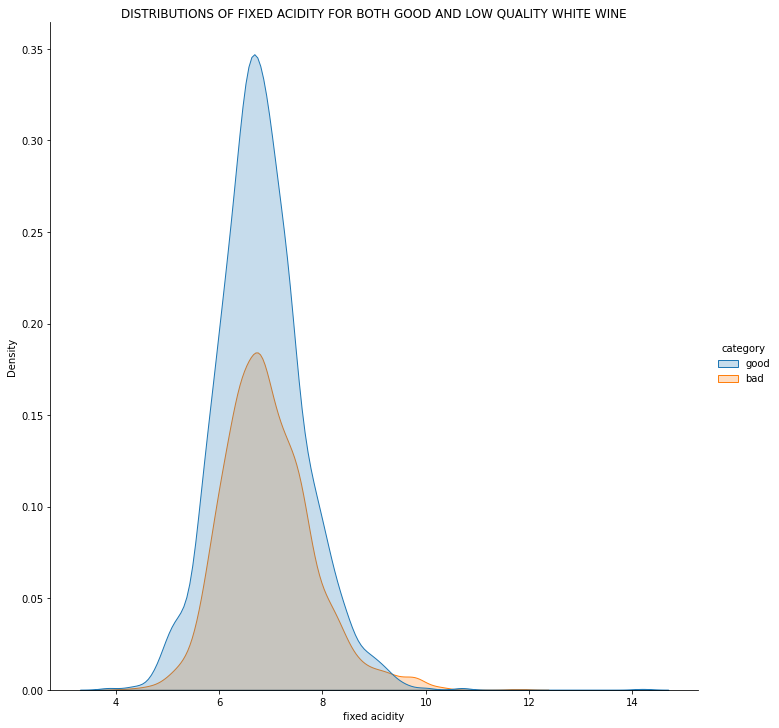

<Figure size 1080x720 with 0 Axes>

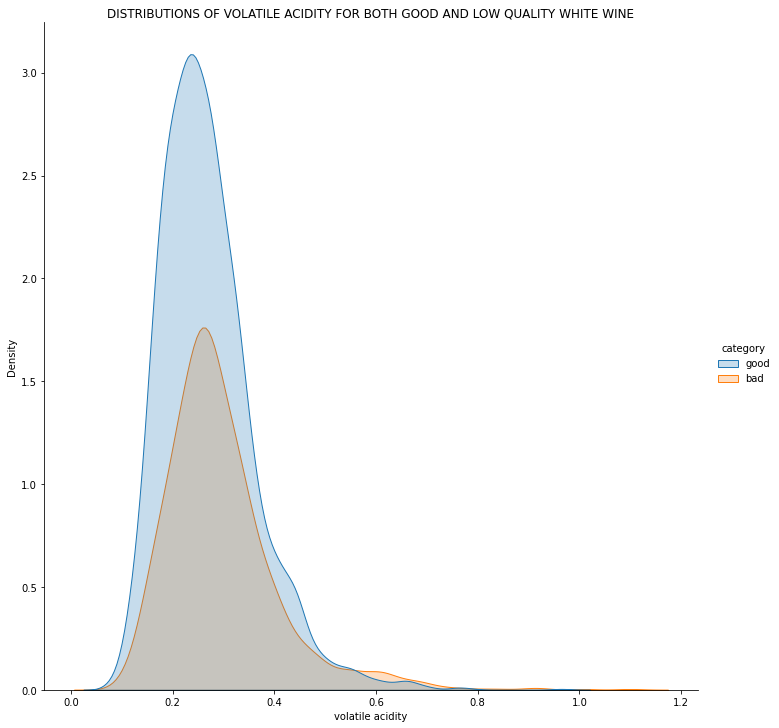

<Figure size 1080x720 with 0 Axes>

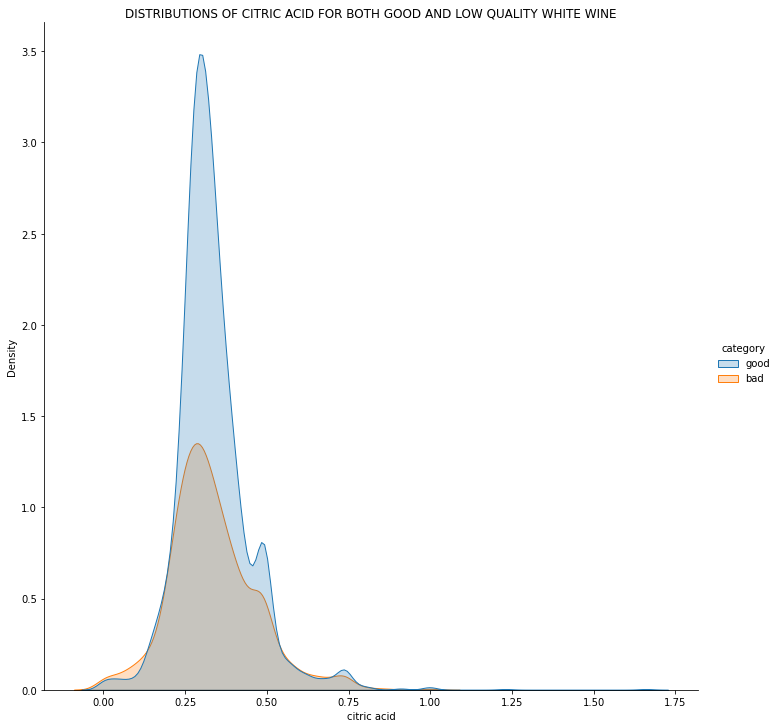

<Figure size 1080x720 with 0 Axes>

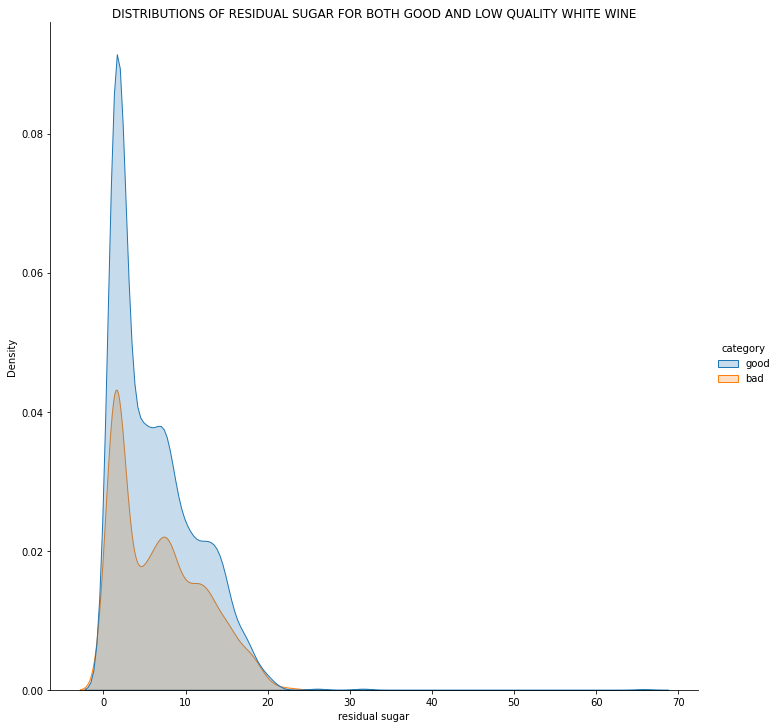

<Figure size 1080x720 with 0 Axes>

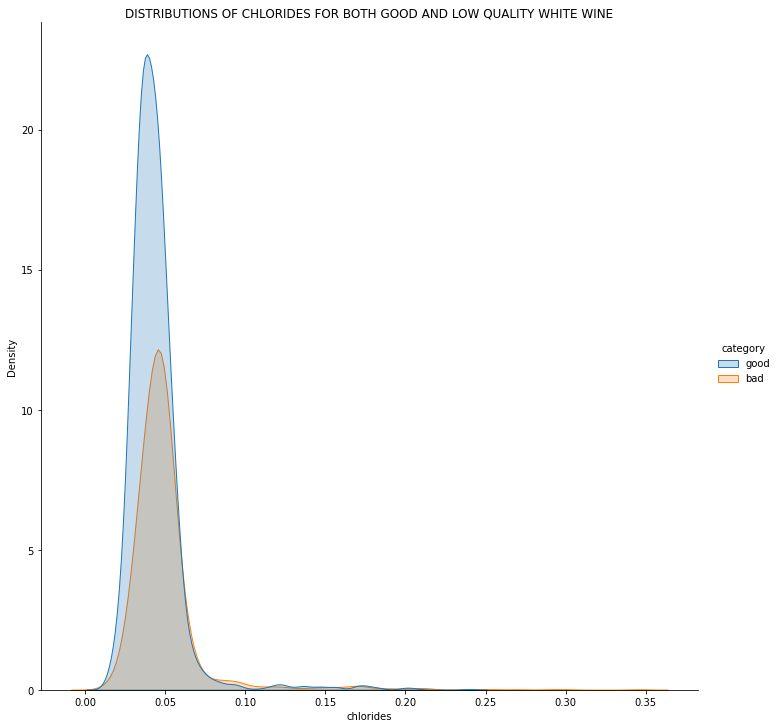

<Figure size 1080x720 with 0 Axes>

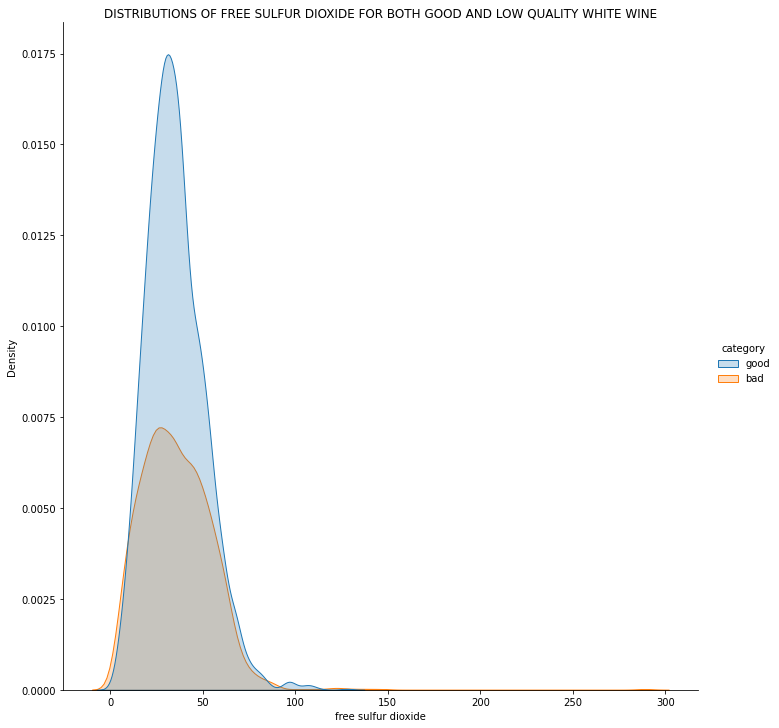

<Figure size 1080x720 with 0 Axes>

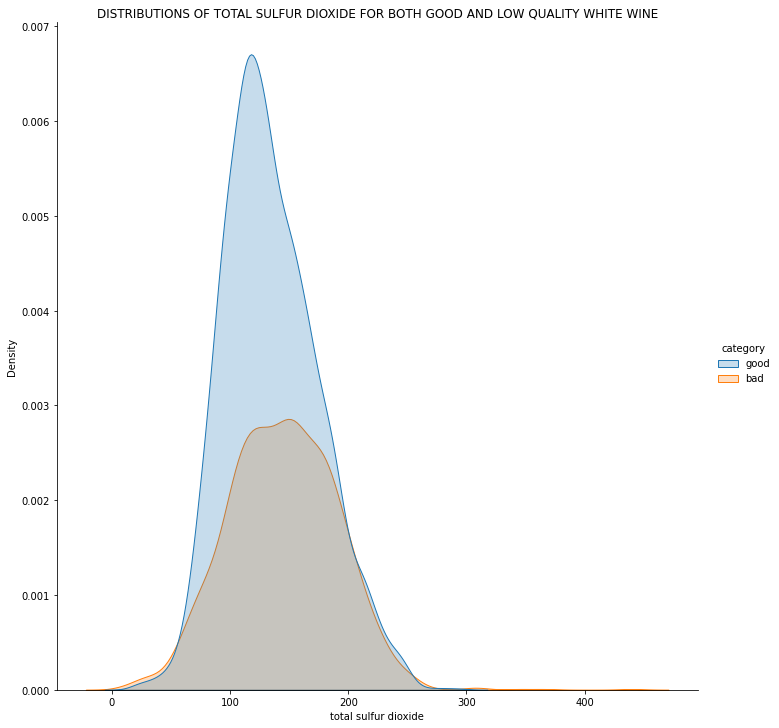

<Figure size 1080x720 with 0 Axes>

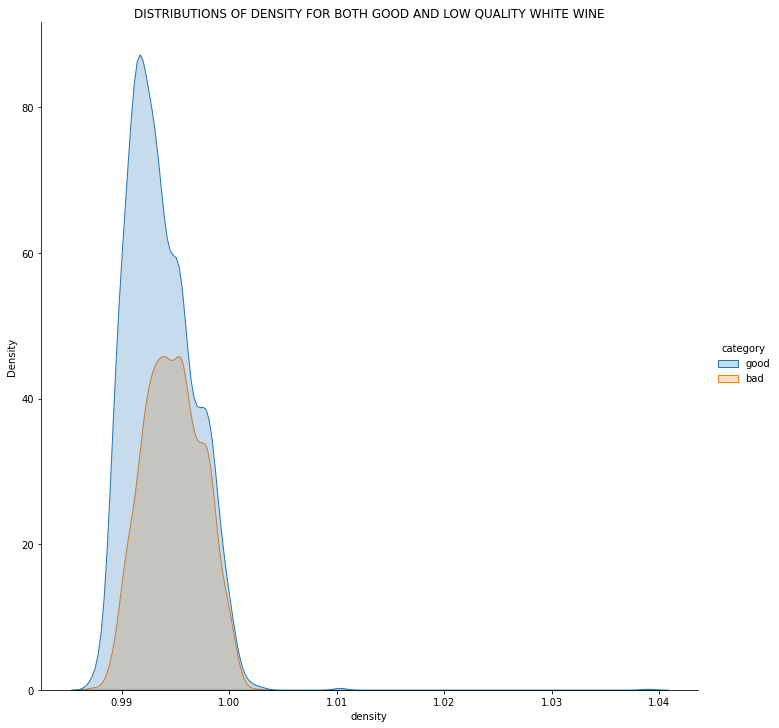

<Figure size 1080x720 with 0 Axes>

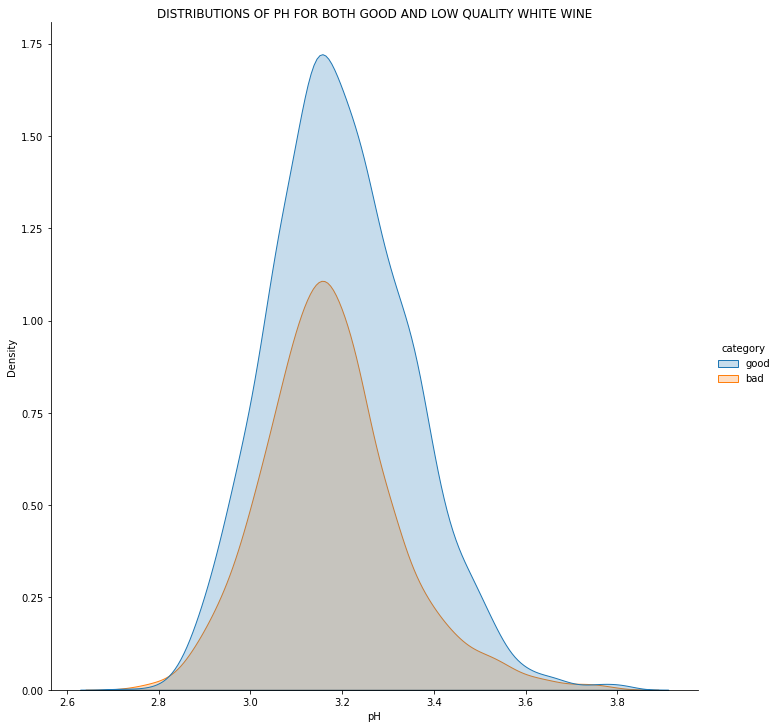

<Figure size 1080x720 with 0 Axes>

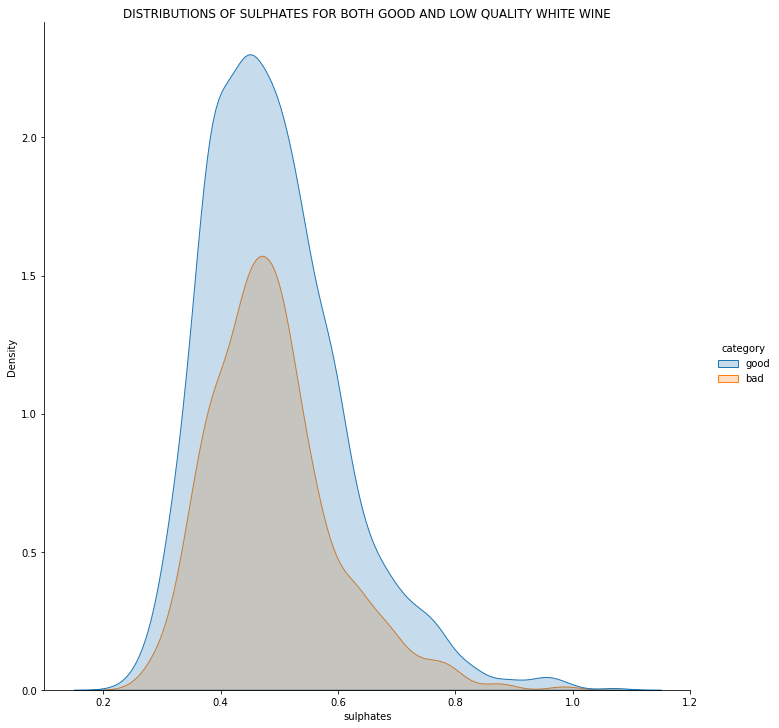

<Figure size 1080x720 with 0 Axes>

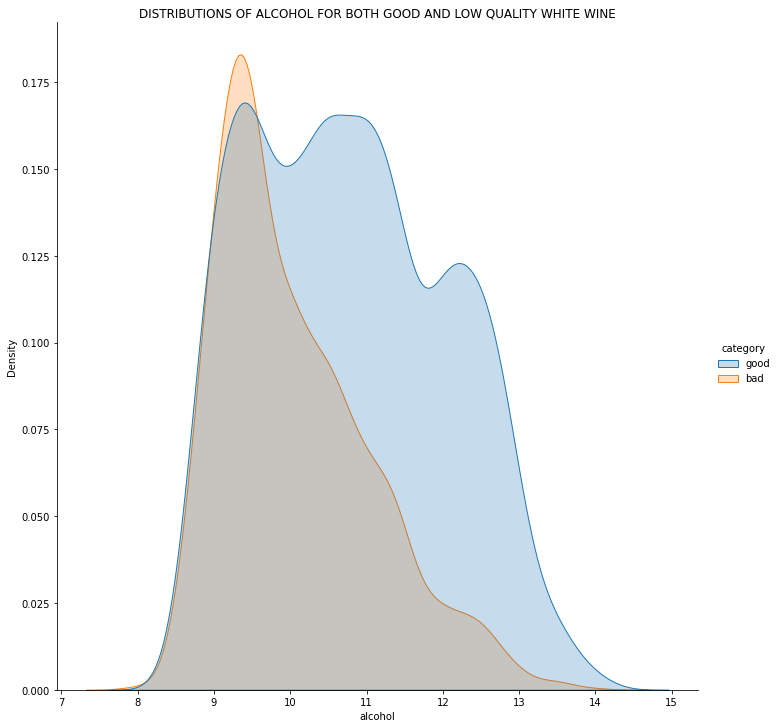

In [11]:
## Comparing distributions of good and bad wine characteristics

### GOOD
for col in white[white.category=="good"][['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]:
    plt.figure(figsize=(15,10))
    sns.displot(white,x=col,hue="category",height=10,kind ="kde",fill = True)
    plt.title("DISTRIBUTIONS OF "+col.upper()+" FOR BOTH GOOD AND LOW QUALITY WHITE WINE")
    plt.show()

<AxesSubplot:>

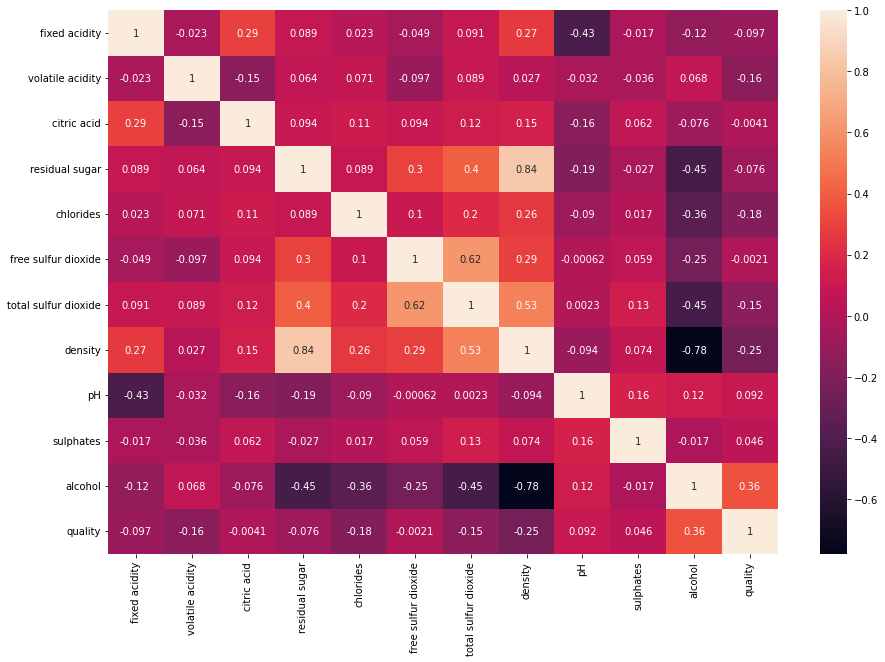

In [12]:
## Correlation matrix to determine what variables to plot their relationship with
plt.figure(figsize = (15,10))
white_corr_mat =white.corr()
mask = np.triu(np.ones_like(white_corr_mat, dtype=bool))
sns.heatmap(white_corr_mat,annot=True)

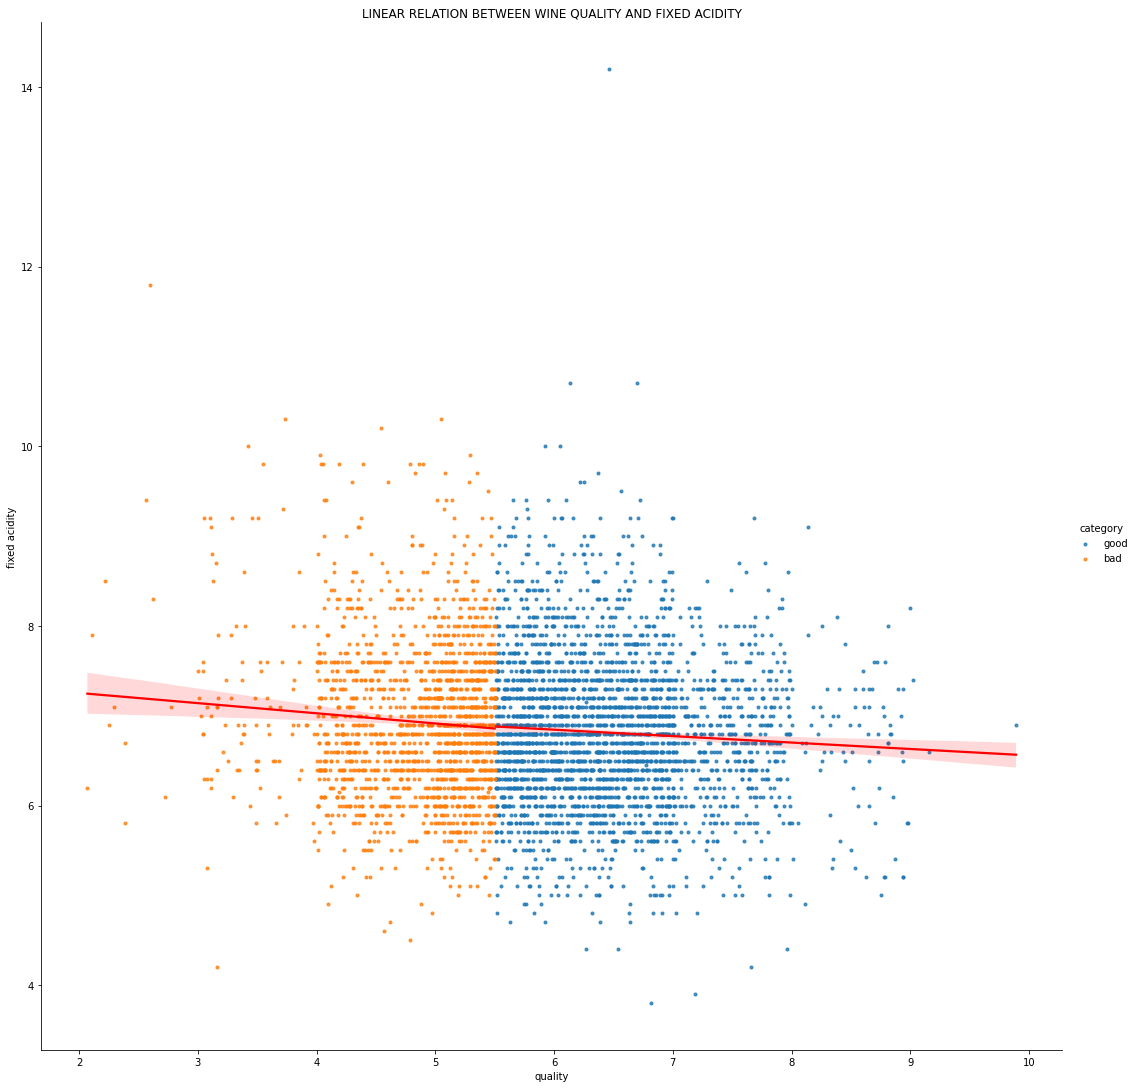

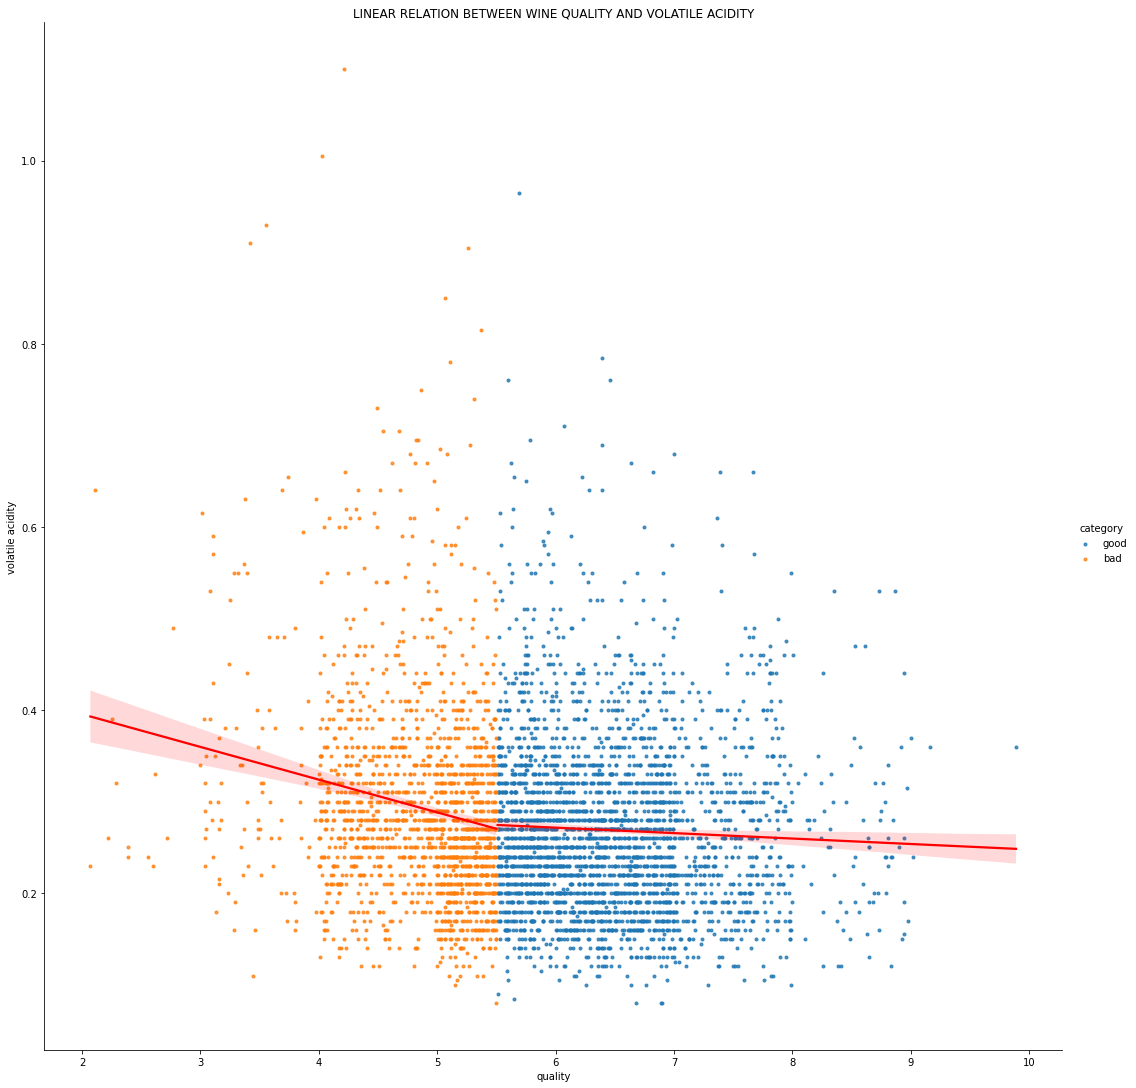

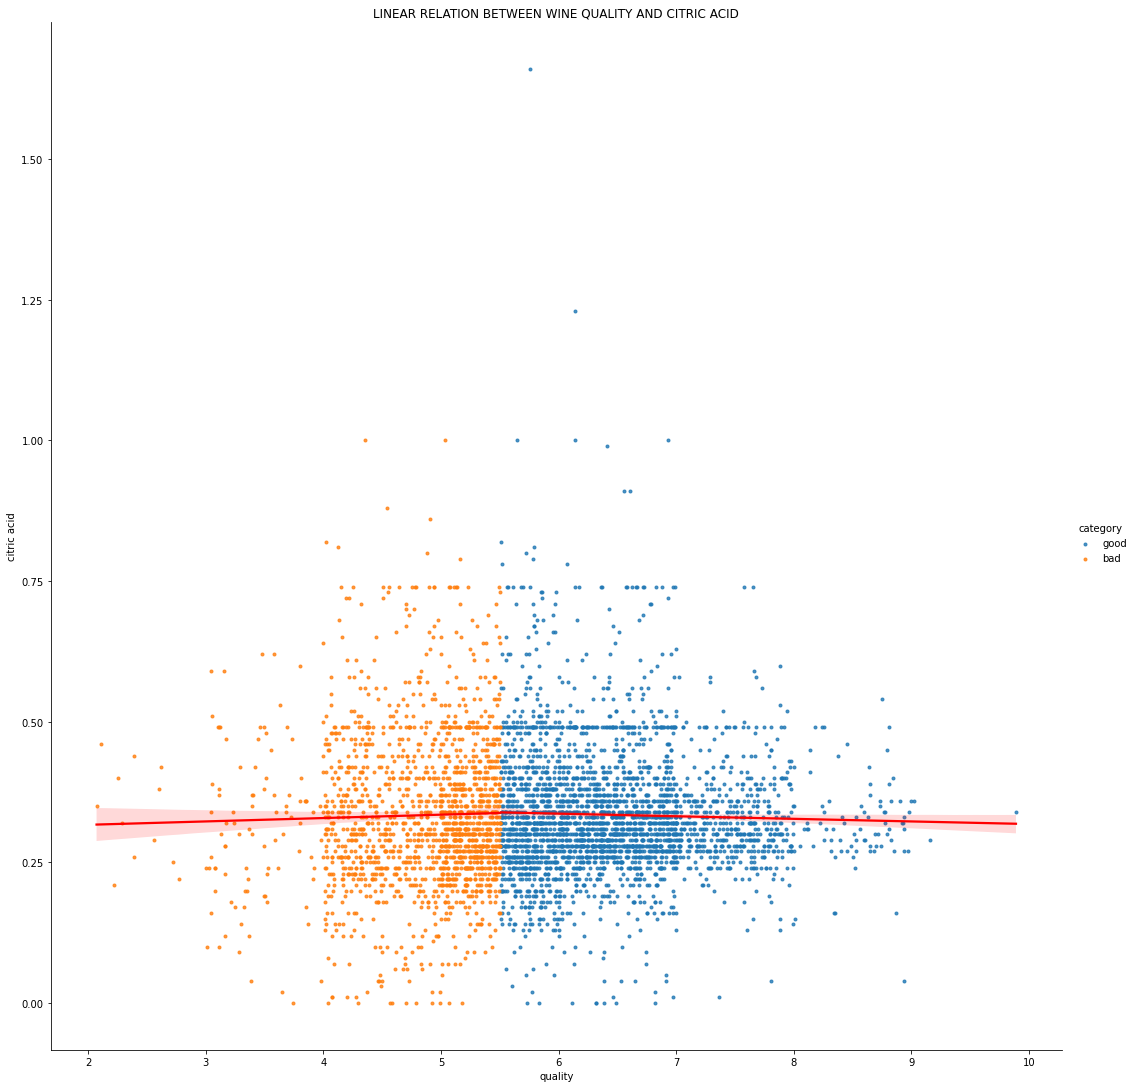

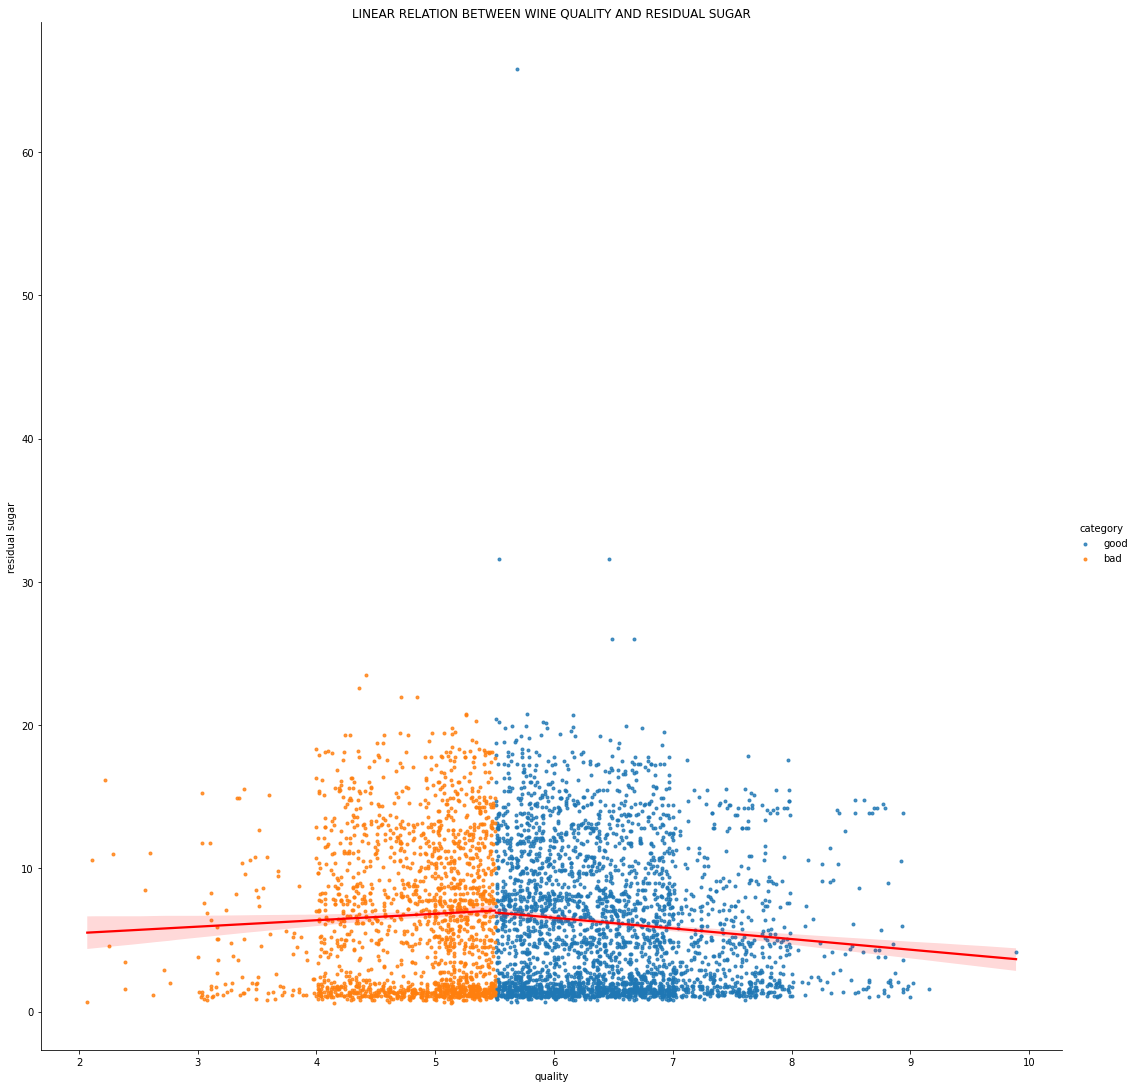

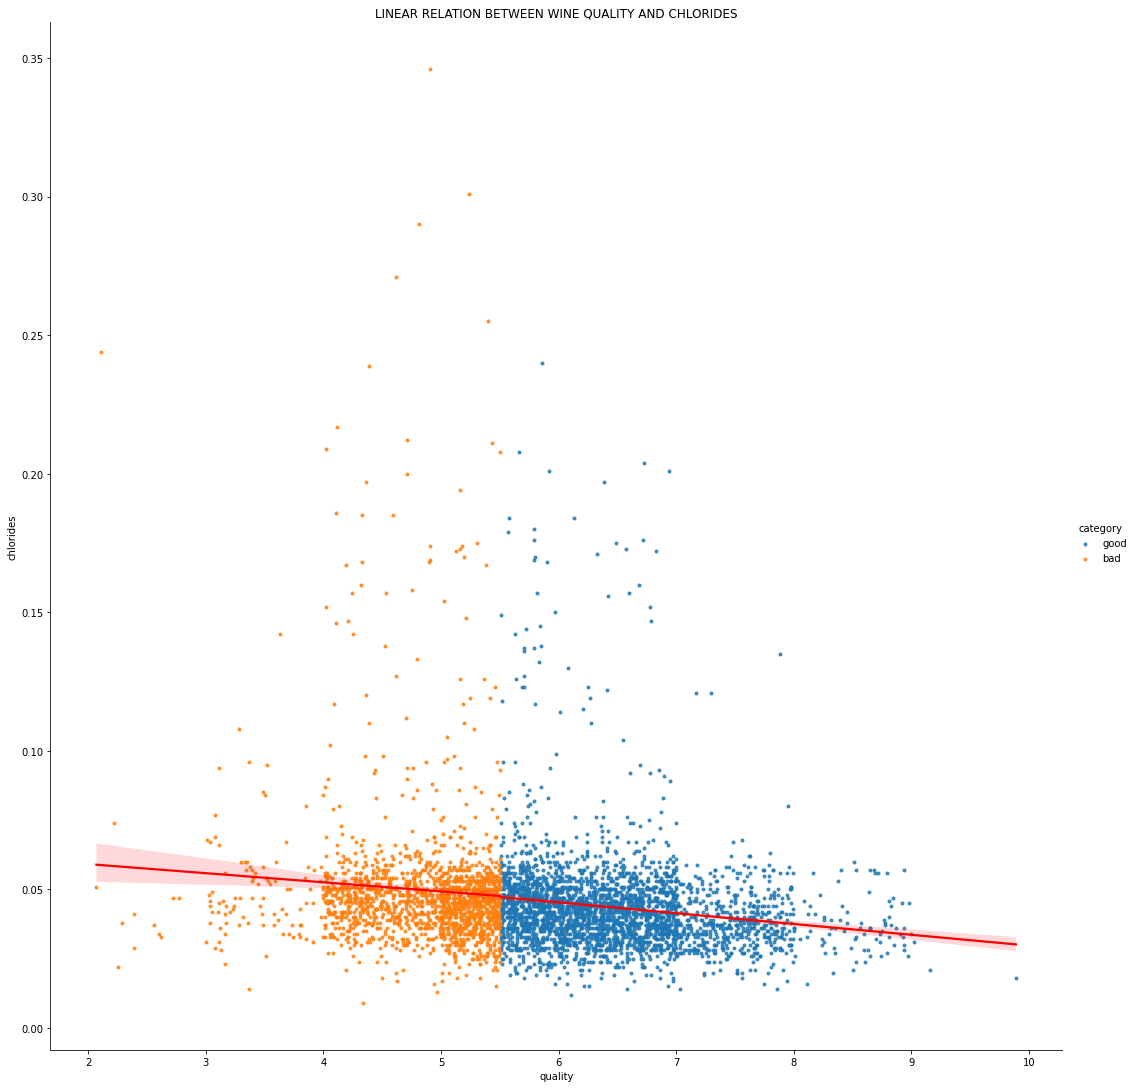

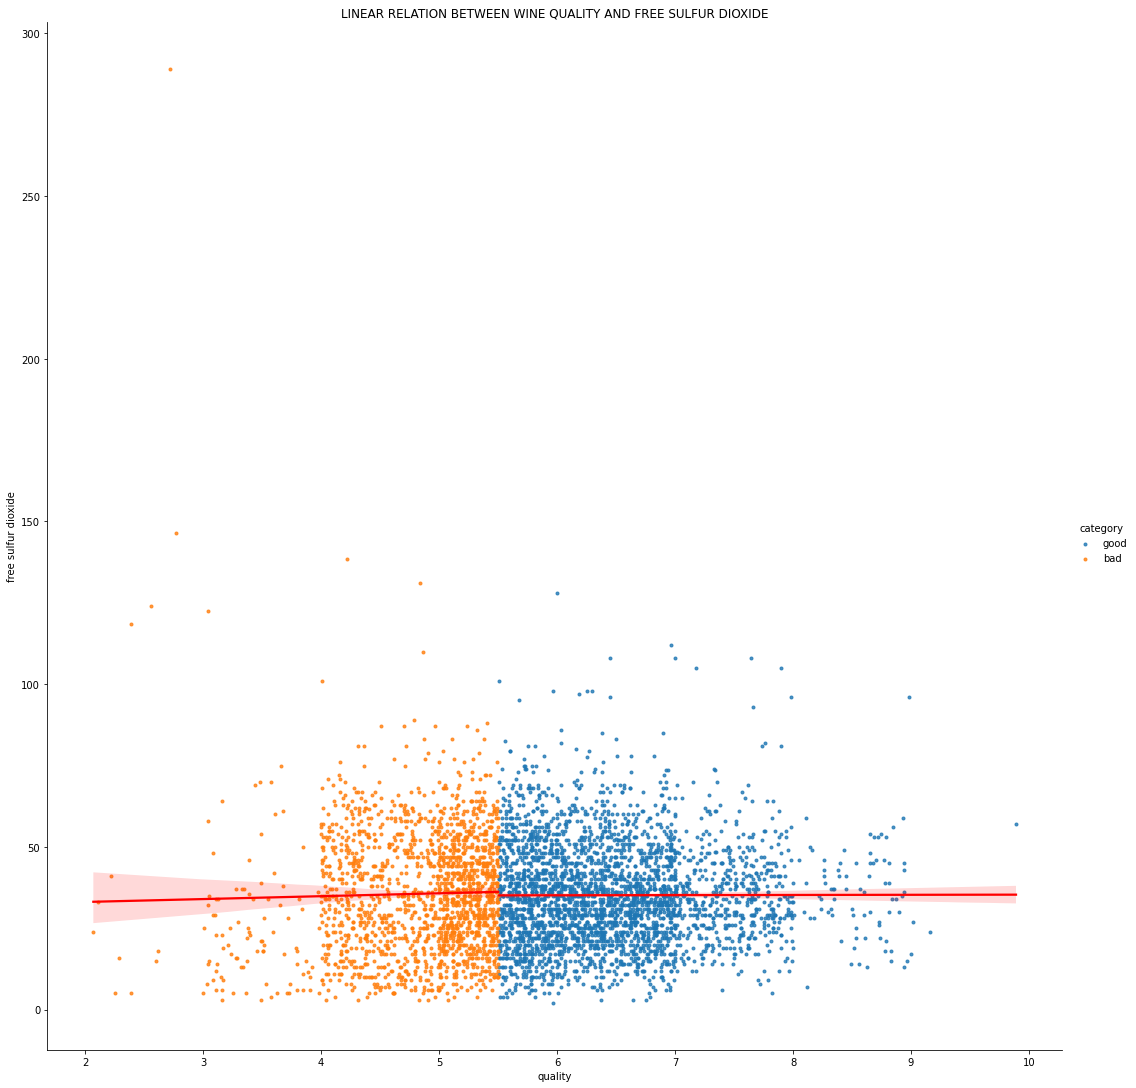

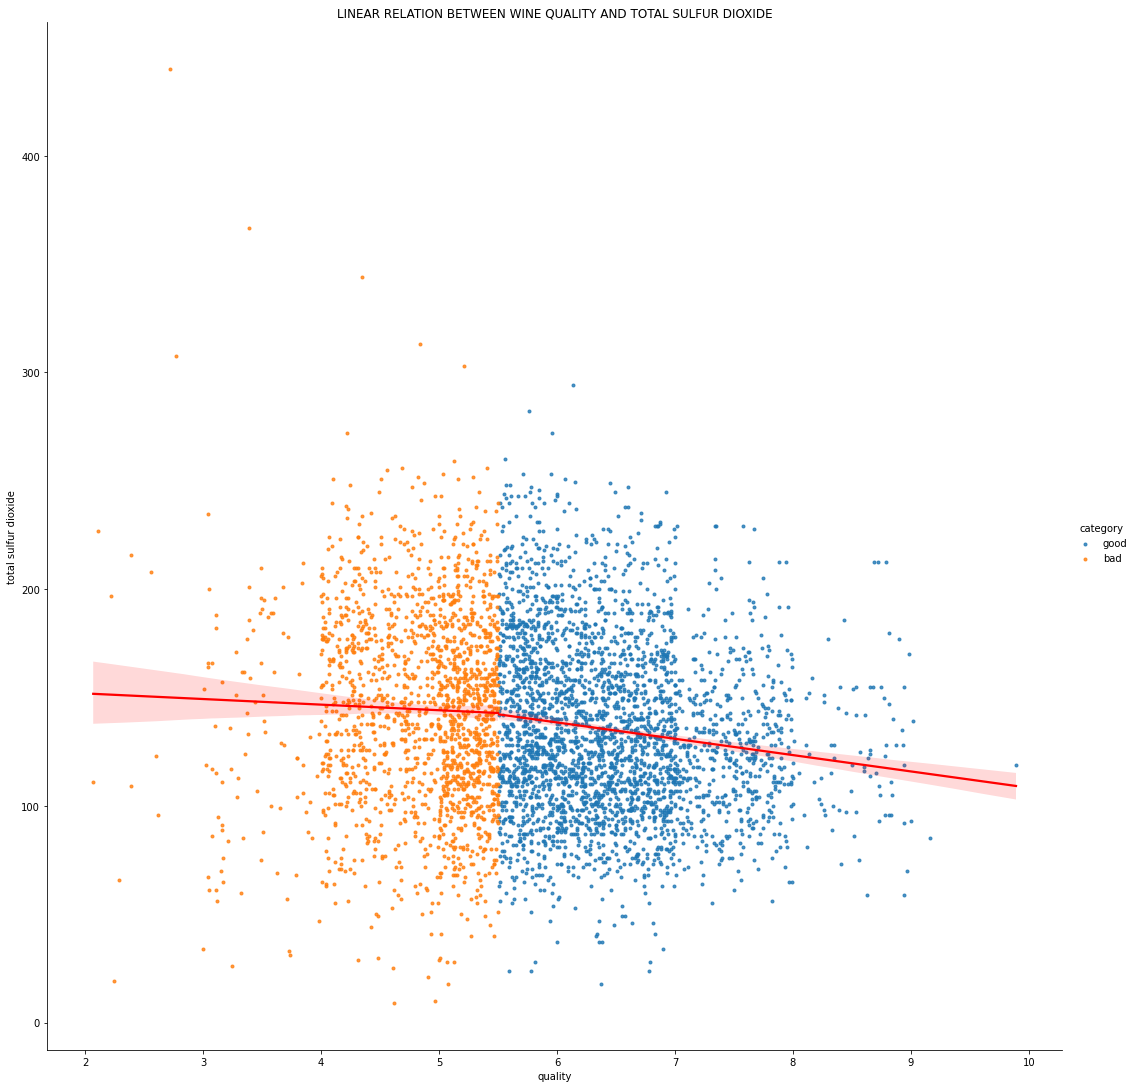

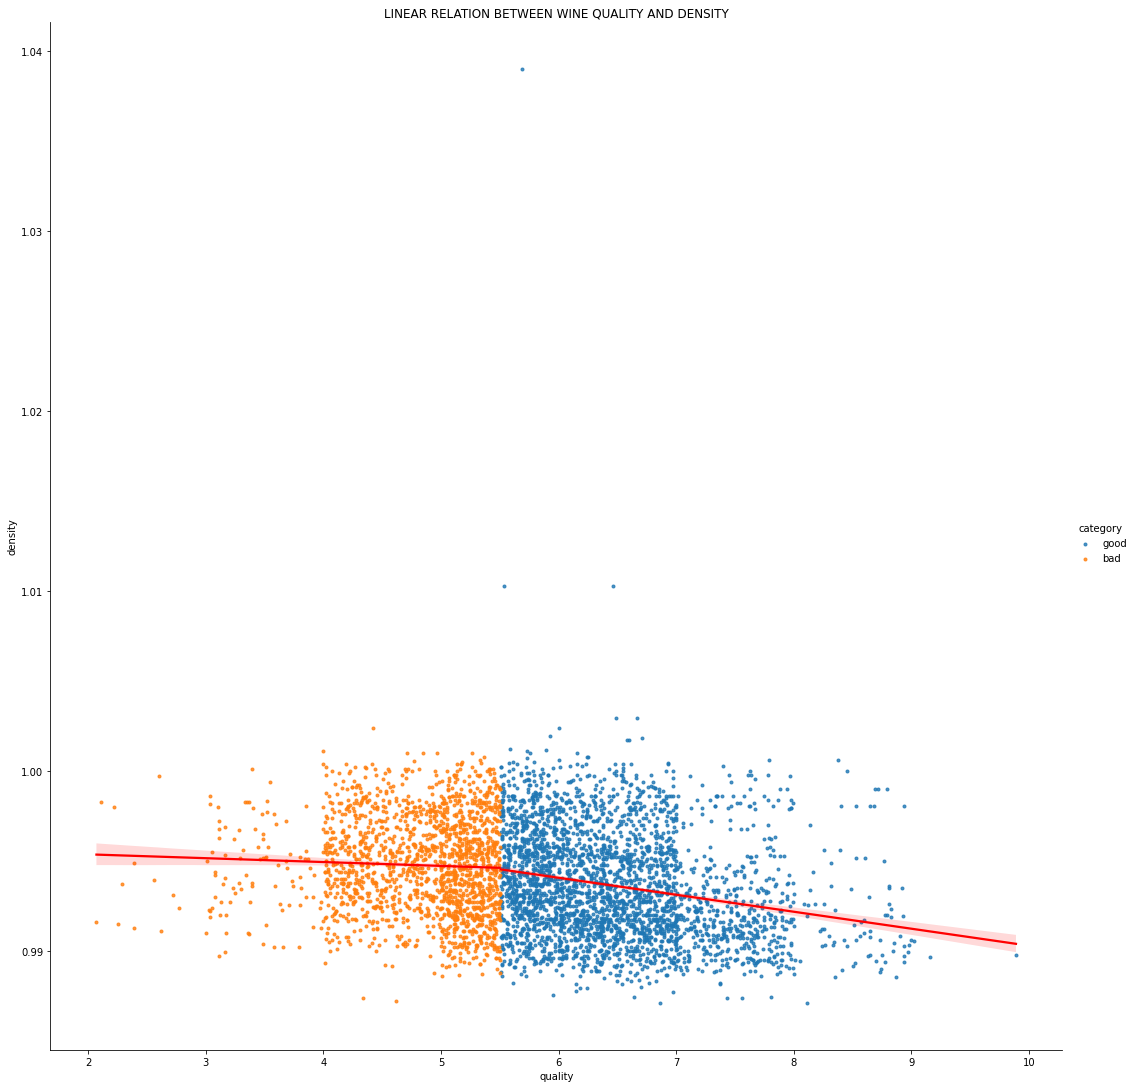

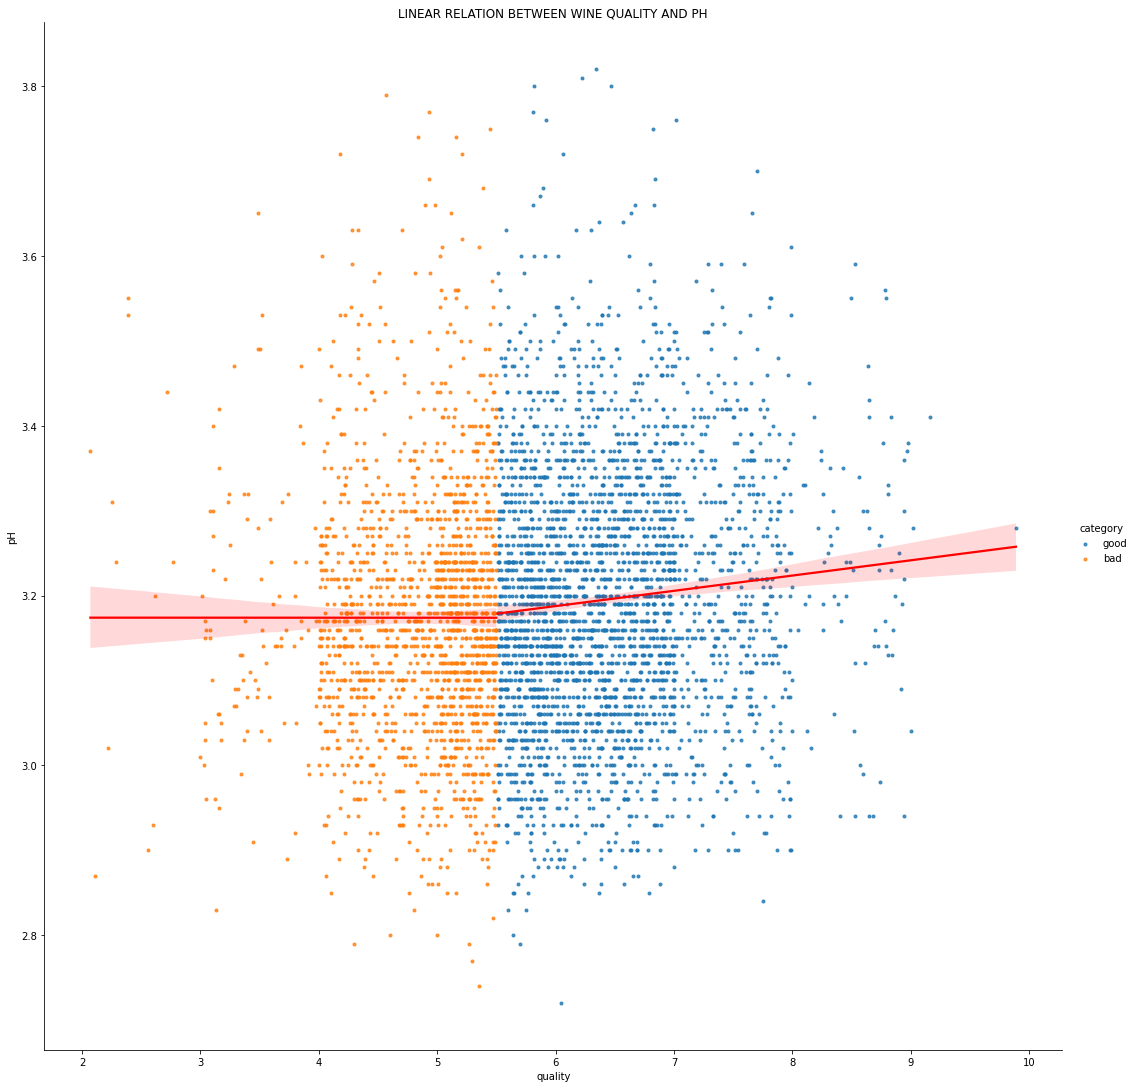

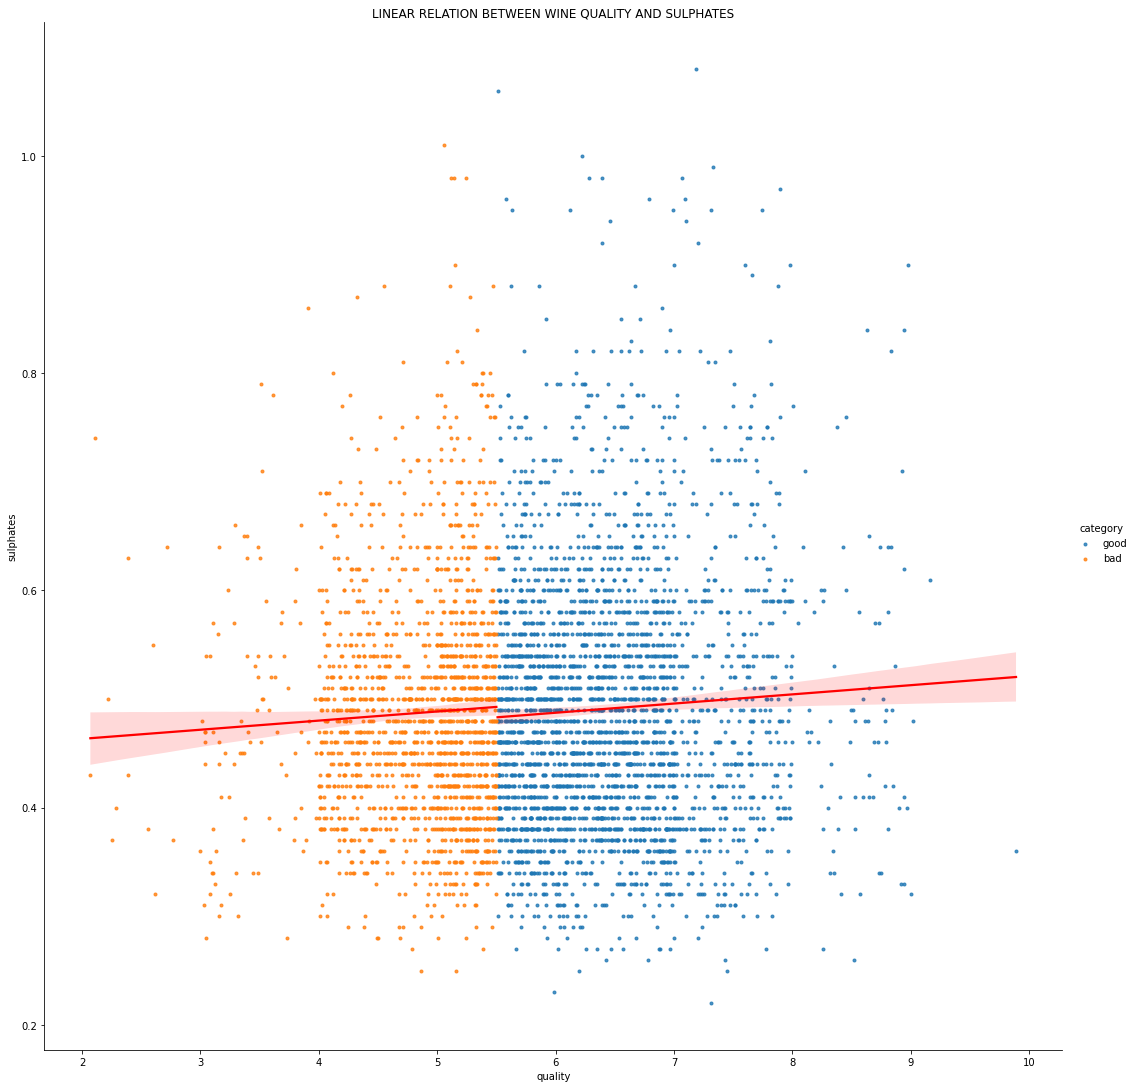

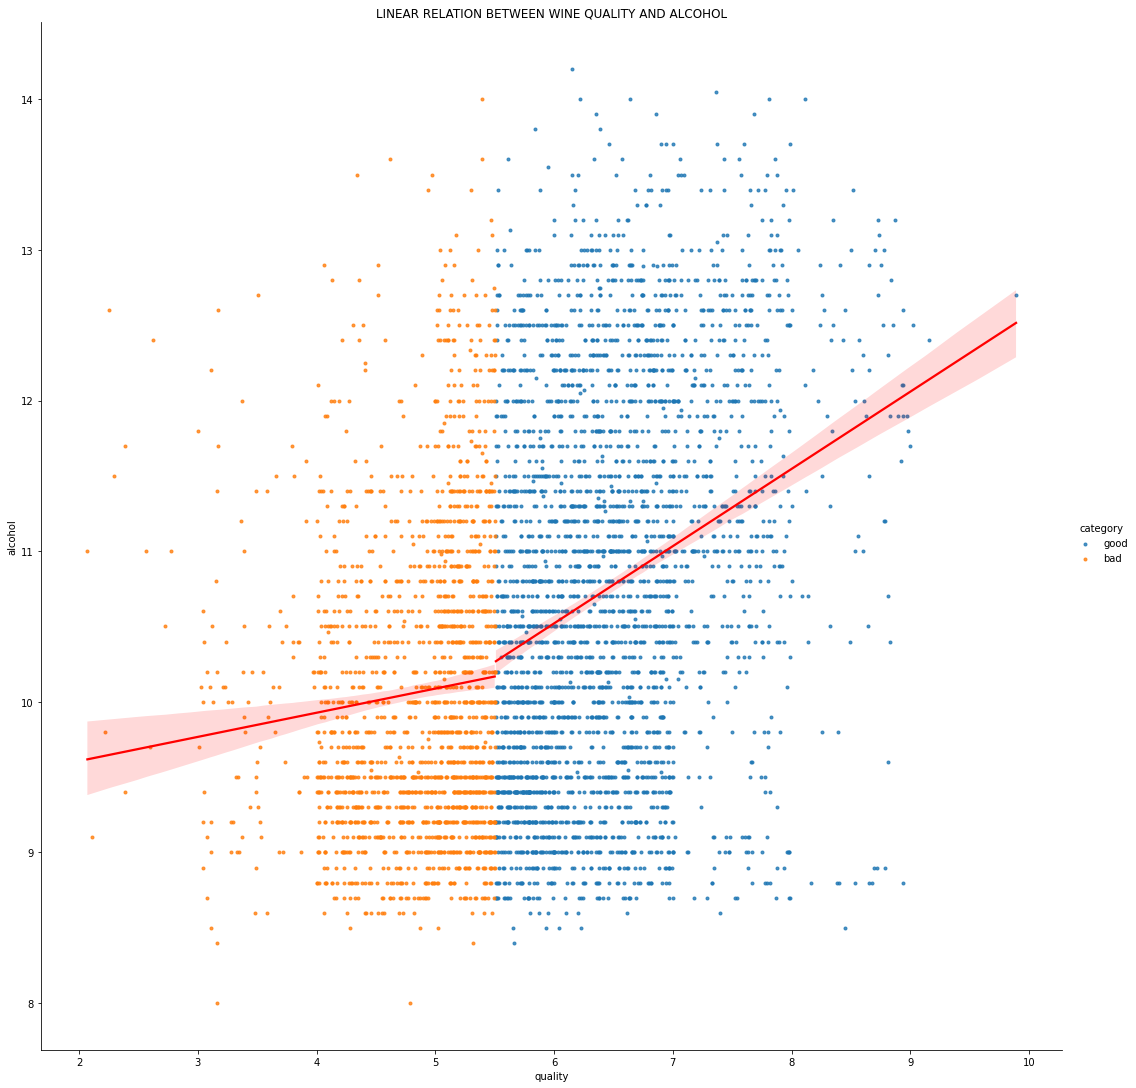

In [19]:
### Comparing wine quality to the other variables
from turtle import color


cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality',"category"]
filt = white[cols]
for col in filt.columns:
    if (col != "quality")&(col!="category"):
        #plt.figure(figsize = (15,10))
        #plt.title("LINEAR RELATION BETWEEN WINE QUALITY AND " +col.upper())
        #sns.scatterplot(x = "quality", y =col, data = filt,hue="category")
        sns.lmplot(x = "quality", y =col,data = filt, height=15, markers=".",line_kws={"color":"red"},hue="category")
        ax = plt.gca()
        ax.set_title("LINEAR RELATION BETWEEN WINE QUALITY AND " +col.upper())
        plt.show()


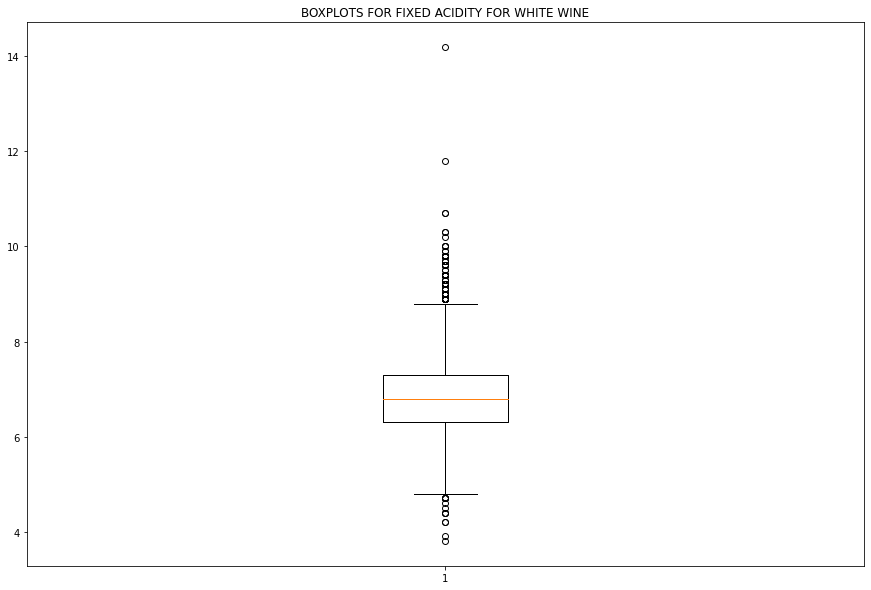

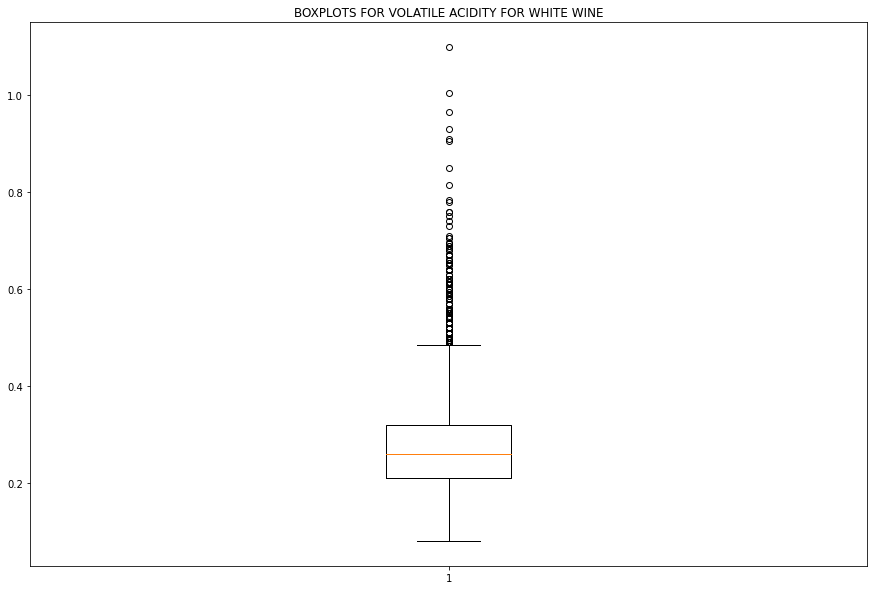

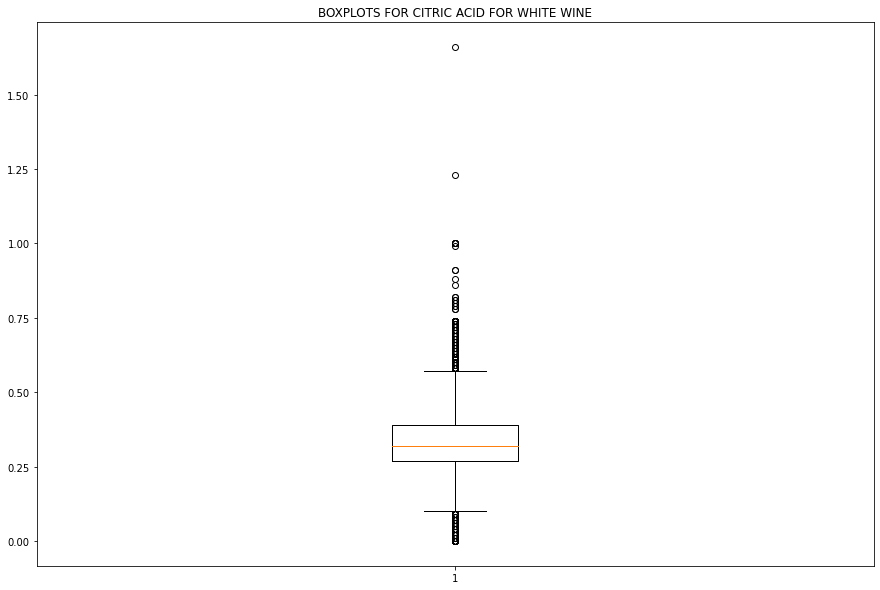

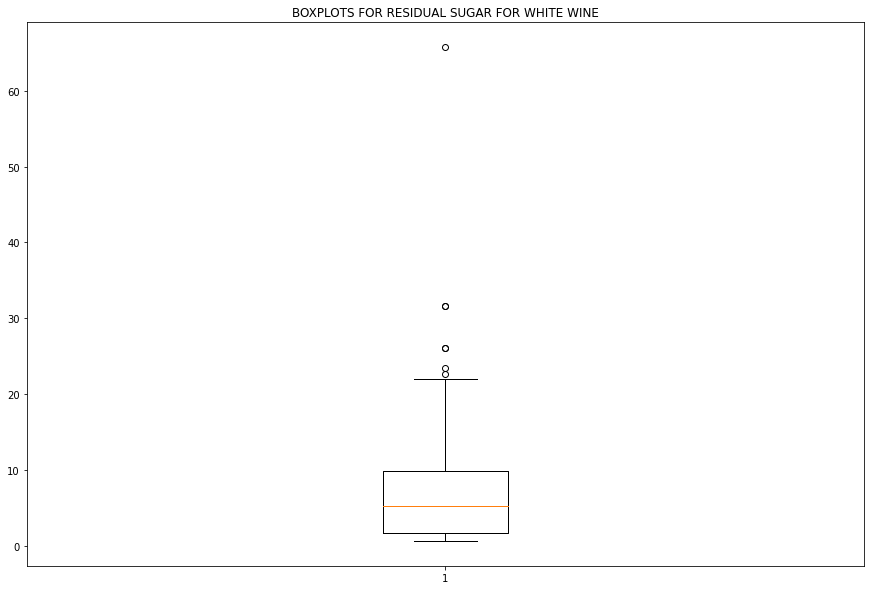

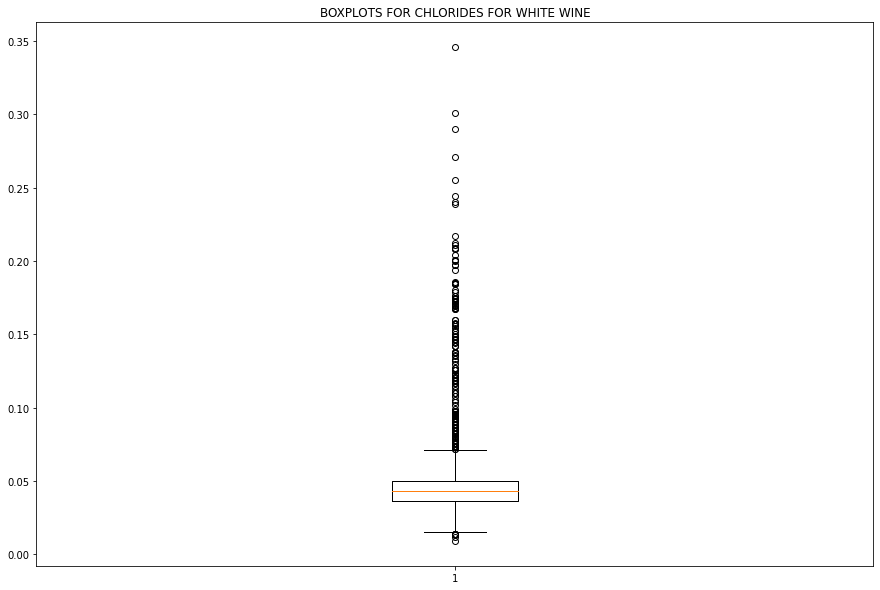

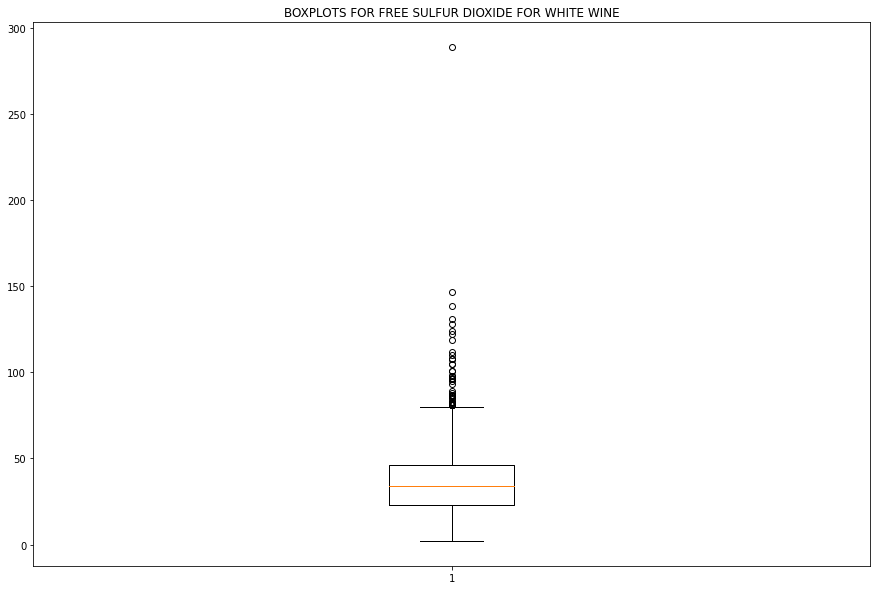

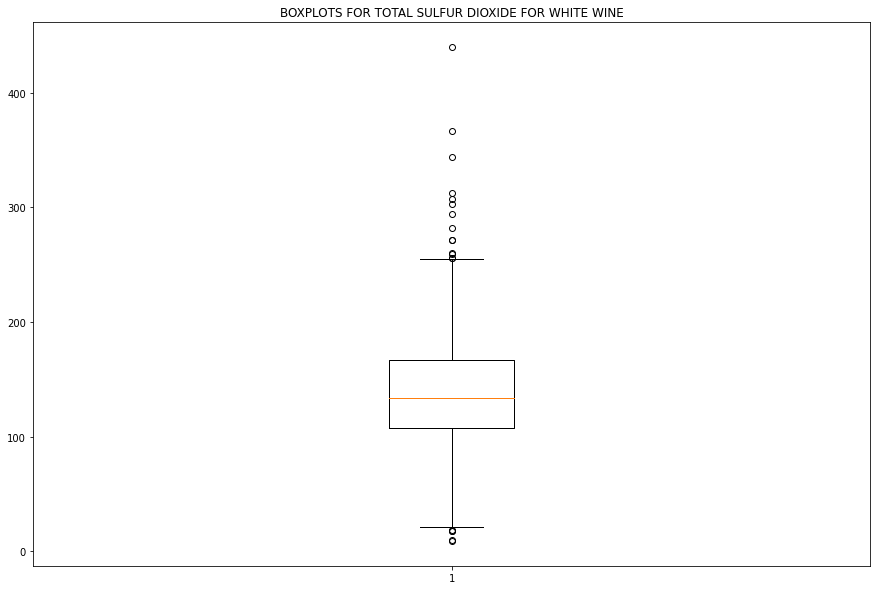

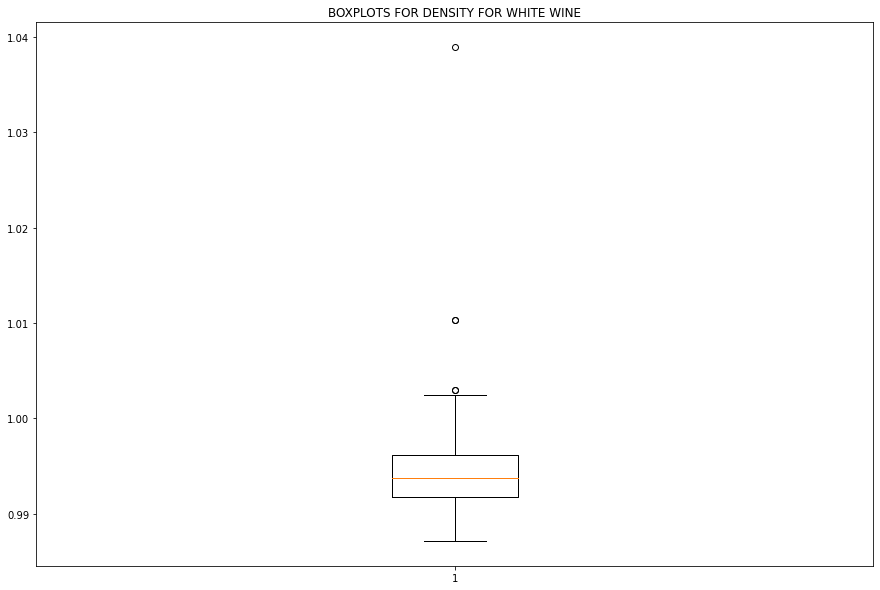

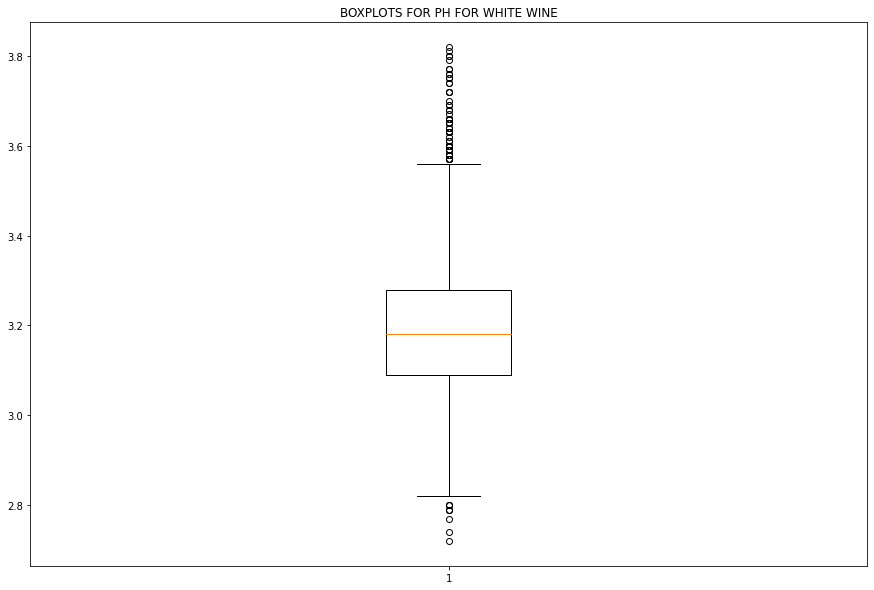

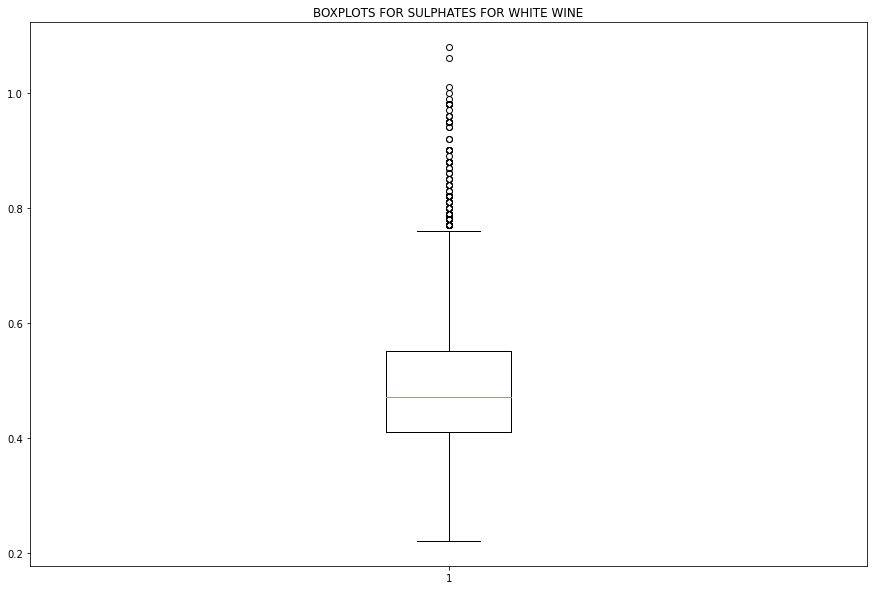

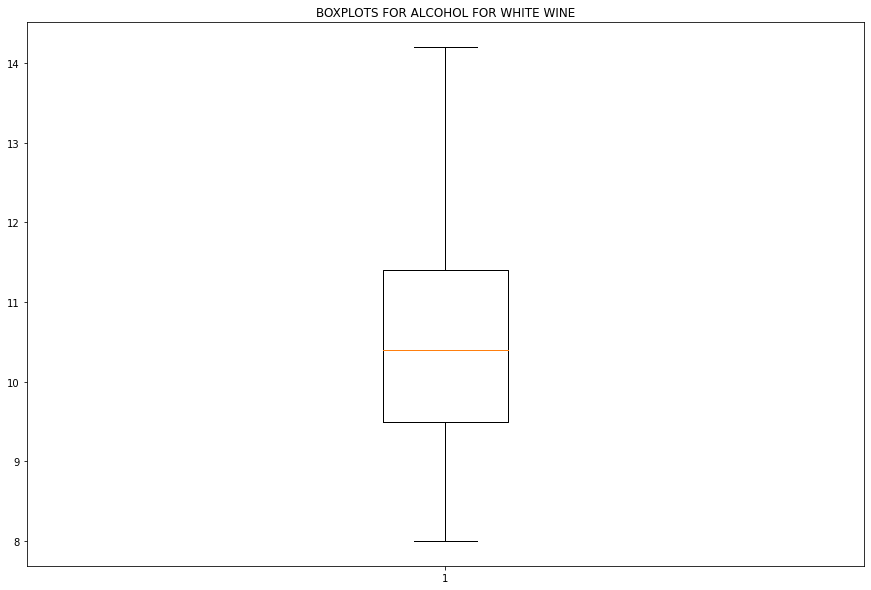

In [27]:
## Checking for outliers
for column in filt.columns:
    if (column != "quality") & (column!="category"):
        plt.figure(figsize =(15,10))
        plt.title("BOXPLOTS FOR "+ column.upper()+" FOR WHITE WINE")
        plt.boxplot(white[column])
        plt.show()